## Logistic Regression Project

In this project we will be working whith an advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

- 'Daily Time Spent on Site': consumer time on site in minutes
- 'Age': cutomer age in years
- 'Area Income': Avg. Income of geographical area of consumer
- 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
- 'Ad Topic Line': Headline of the advertisement
- 'City': City of consumer
- 'Male': Whether or not consumer was male
- 'Country': Country of consumer
- 'Timestamp': Time at which consumer clicked on Ad or closed window
- 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('advertising.csv')

In [4]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [8]:
data.describe() 

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [9]:
data.describe(include=[object]) 

,Ad Topic Line,City,Country,Timestamp
count,1000,1000,1000,1000
unique,1000,969,237,1000
top,Cloned 5thgeneration orchestration,Lisamouth,France,2016-03-27 00:53:11
freq,1,3,9,1


## Exploratory Data Analysis


In [17]:
sns.set_style('whitegrid')
sns.set_palette('pastel')

<Axes: xlabel='Age', ylabel='Count'>

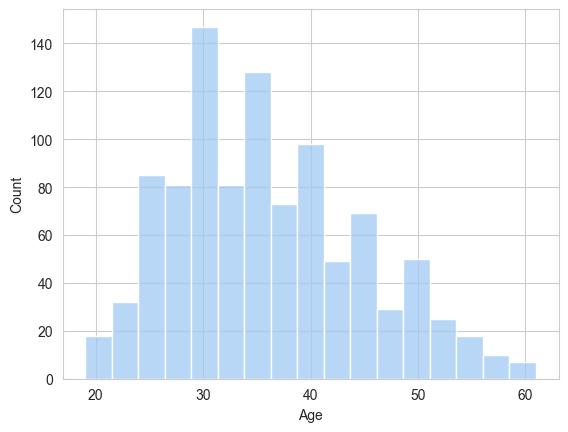

In [18]:
sns.histplot(data=data, x='Age')

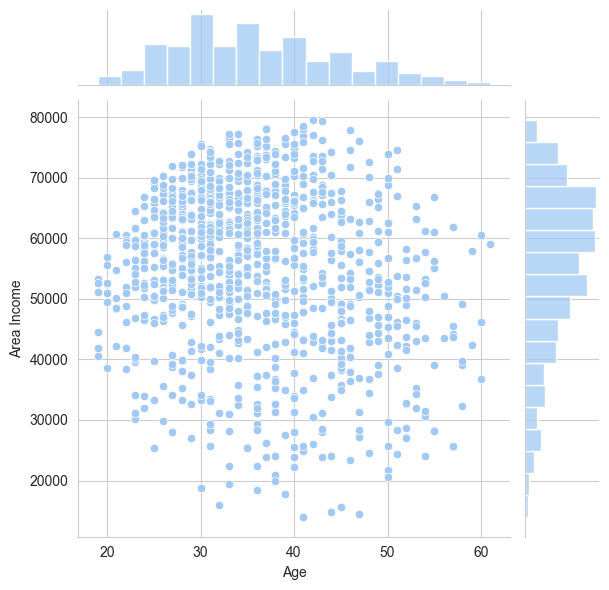

In [22]:
sns.jointplot(data=data, x='Age', y='Area Income')

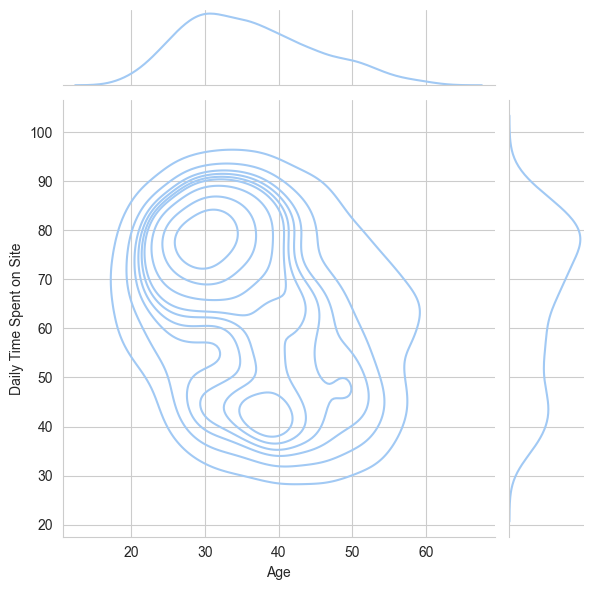

In [24]:
sns.jointplot(data=data, x='Age', y='Daily Time Spent on Site', kind='kde')

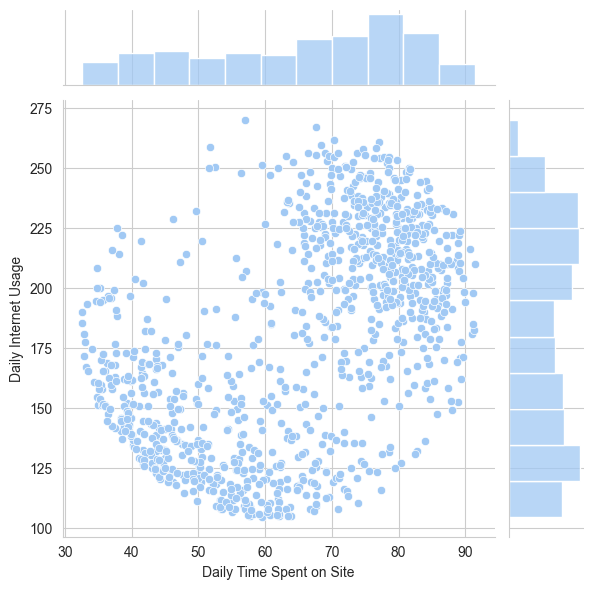

In [26]:
sns.jointplot(data=data, x='Daily Time Spent on Site', y='Daily Internet Usage')

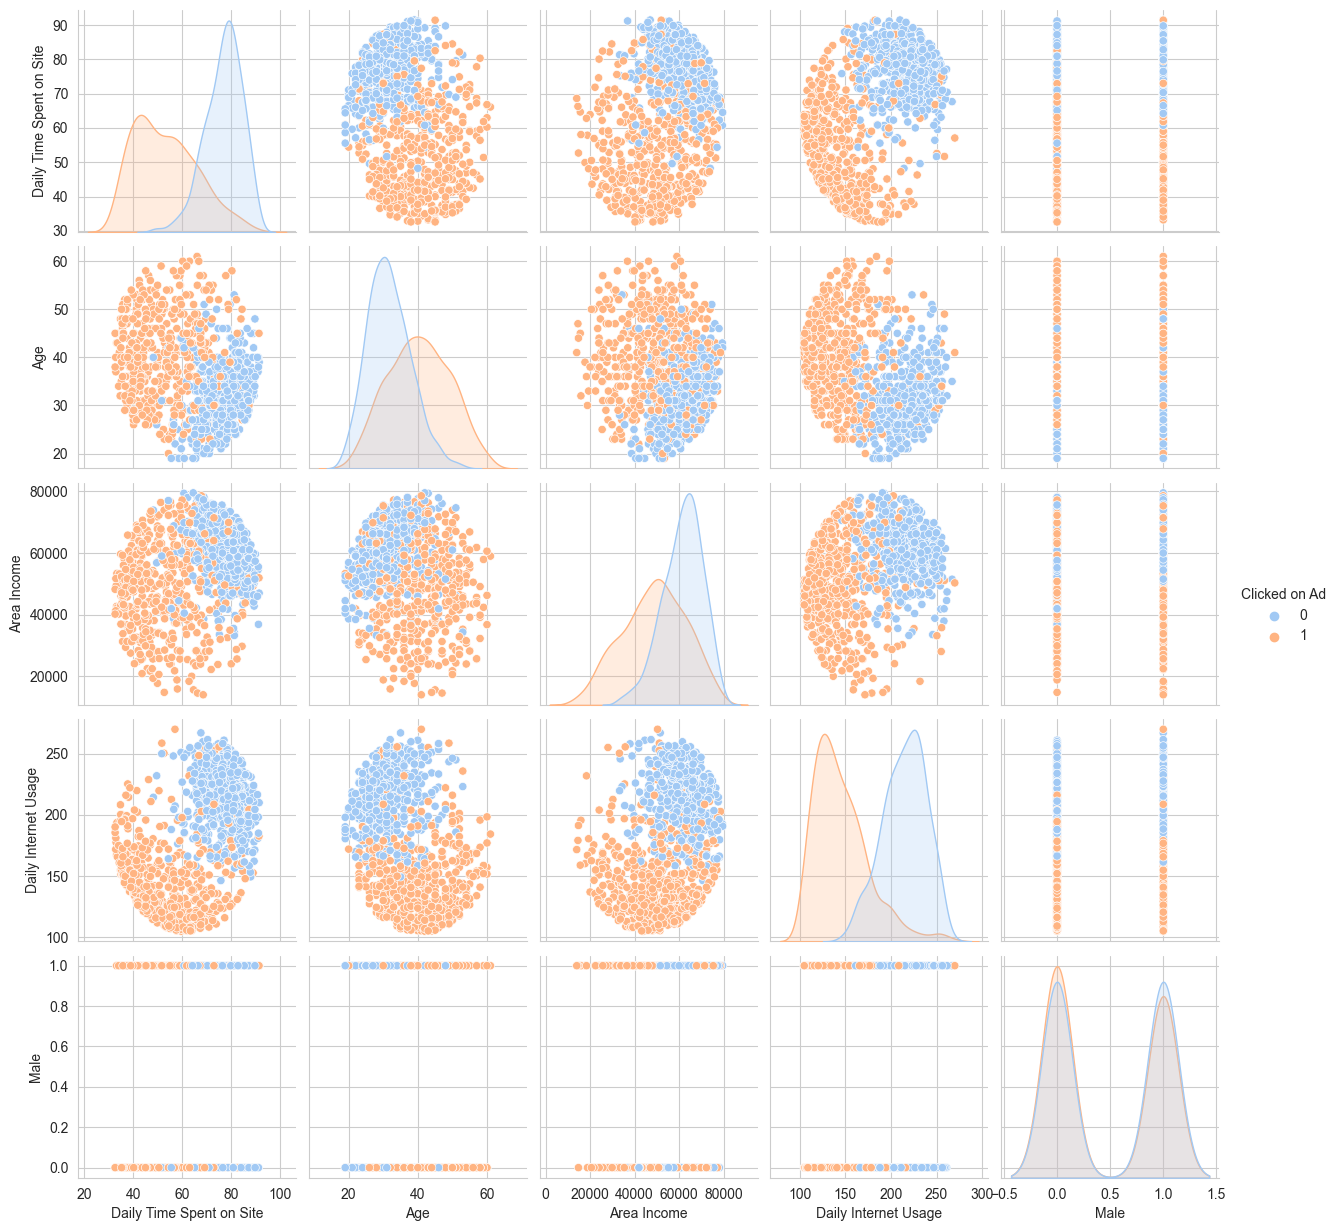

In [27]:
sns.pairplot(data, hue='Clicked on Ad')

In [28]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [32]:
#transformed the Timestamp from 2016-03-27 00:53:11 intro Year

data['Year'] = data['Timestamp'].apply(lambda x: x.split('-')[0])
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Year
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016


## Logistic Regression

In [34]:
#assign X and y and split train test
from sklearn.model_selection import train_test_split

In [37]:
X = data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male','Year']]
y = data['Clicked on Ad']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
#creating & training the model

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lm = LogisticRegression()

In [41]:
lm.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#Now predict values for the testing data.

In [48]:
predictions = lm.predict(X_test)

In [51]:
# Create a classification report for the model

from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       145
           1       1.00      0.94      0.97       155

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

